# Import Resources

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import json
import  tensorflow_hub as hub

from PIL import Image

# Load the Keras Model

In [2]:
model = tf.keras.models.load_model(
    './model.h5',
    custom_objects={
        'KerasLayer': hub.KerasLayer
    }
)

# Inference for Classification

In [3]:
img_width = 224
img_height = 224
batch_size = 64

In [4]:
def process_image(np_image):
    
    image_tensor = tf.image.convert_image_dtype(np_image, dtype=tf.float32)
    
    return tf.image.resize(image_tensor, [img_height, img_width]).numpy()

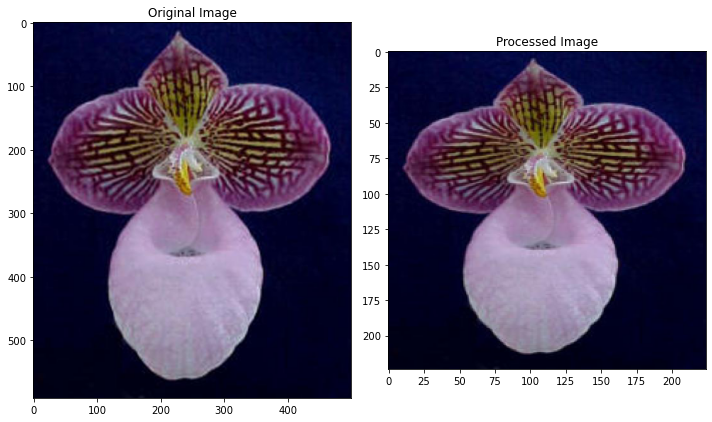

In [5]:
image_path = './test_images/hard-leaved_pocket_orchid.jpg'
im = Image.open(image_path)
test_image = np.asarray(im)

processed_test_image = process_image(test_image)

fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
ax1.imshow(test_image)
ax1.set_title('Original Image')
ax2.imshow(processed_test_image)
ax2.set_title('Processed Image')
plt.tight_layout()
plt.show()

In [6]:
def predict(image_path, model, top_k):
    
    im = Image.open(image_path)
    test_image = np.asarray(im)

    processed_test_image = process_image(test_image)
    
    image = tf.expand_dims(processed_test_image, 0)
    
    result = model.predict(image)
    
    result_dict = dict(enumerate(result[0]))

    sorted_list_by_value = sorted(result_dict, key=result_dict.__getitem__)
    
    sorted_list_by_value.reverse()
    
    probs = []
    classes = []
    
    for index in sorted_list_by_value[:top_k]:
        
        tmp_class = str(index + 1)
        tmp_prob = result_dict[index]
        
        probs.append(tmp_prob)
        classes.append(tmp_class)
    
    
    return probs, classes

In [7]:
image_path = './test_images/hard-leaved_pocket_orchid.jpg'

probs, classes = predict(image_path, model, 5)

print(probs)
print(classes)

[1.0, 1.2631564e-08, 3.337813e-09, 1.2442722e-09, 3.2752942e-10]
['2', '6', '67', '102', '81']


# Sanity Check

In [8]:
with open('label_map.json', 'r') as f:
    class_names = json.load(f)

In [9]:
def image_plotting(image_path):
    
    im = Image.open(image_path)
    t_image = np.asarray(im)

    processed_test_image = process_image(t_image)
    
    probs, classes = predict(image_path, model, 5)
    
    title = image_path.split('/')[2].split('.')[0]
    
    c_names = [class_names[clss] for clss in classes]

    fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
    ax1.imshow(processed_test_image)
    ax1.set_title(title)
    ax2.barh(np.arange(5), probs)
    ax2.set_aspect(0.2)
    ax2.set_yticks(np.arange(5))
    ax2.set_yticklabels(c_names, size='small')
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

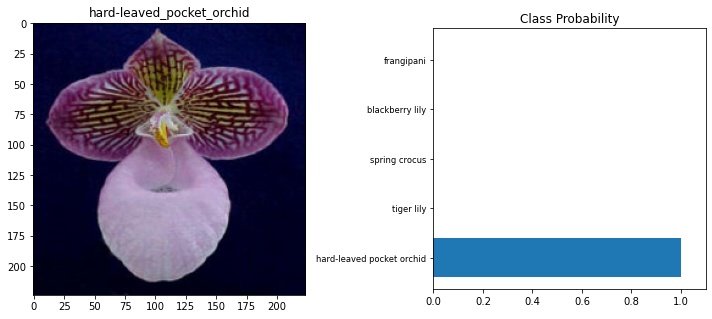

In [10]:
image_path = './test_images/hard-leaved_pocket_orchid.jpg'

image_plotting(image_path)

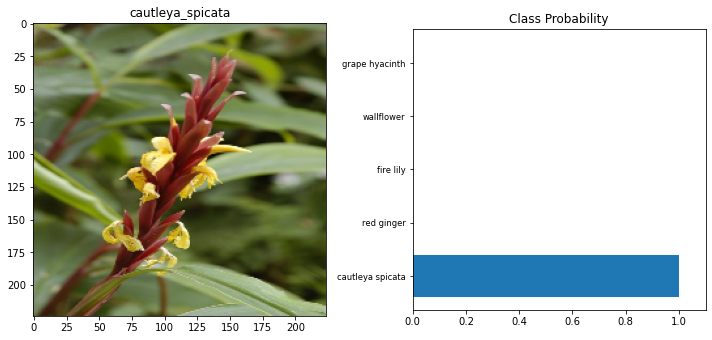

In [11]:
image_path = './test_images/cautleya_spicata.jpg'

image_plotting(image_path)

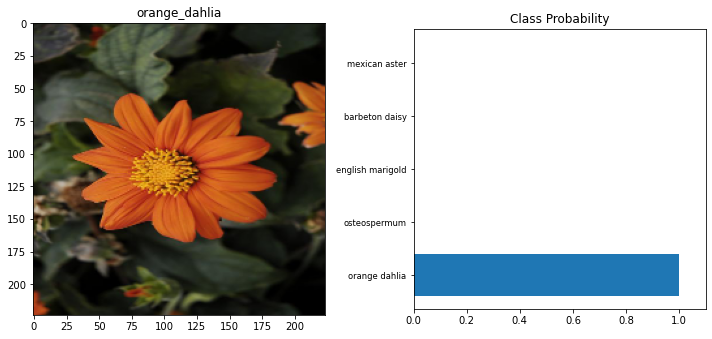

In [12]:
image_path = './test_images/orange_dahlia.jpg'

image_plotting(image_path)

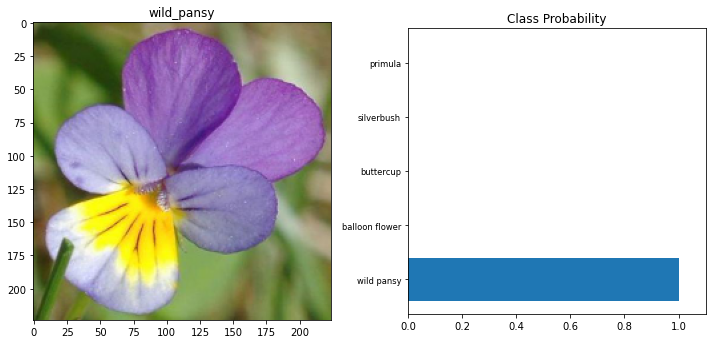

In [13]:
image_path = './test_images/wild_pansy.jpg'

image_plotting(image_path)